In [32]:
import pandas as pd
import numpy as np
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk import pos_tag
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /Users/uelski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/uelski/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/uelski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/uelski/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
# create dataframe
df = pd.read_csv('forecast_data.csv')

In [34]:
df.shape

(2941, 5)

In [35]:
df.isnull().sum()

datetime          0
Above Treeline    0
Treeline          0
Below Treeline    0
Summary_clean     1
dtype: int64

In [36]:
df.dropna(subset=['Summary_clean'], inplace=True)

In [37]:
df.isnull().sum()

datetime          0
Above Treeline    0
Treeline          0
Below Treeline    0
Summary_clean     0
dtype: int64

In [38]:
df.shape

(2940, 5)

In [39]:
df['Above Treeline'].value_counts()

Above Treeline
moderate        1339
considerable     848
low              598
high             137
earlySeason       18
Name: count, dtype: int64

In [40]:
df['Treeline'].value_counts()

Treeline
moderate        1235
low              806
considerable     754
high             127
earlySeason       18
Name: count, dtype: int64

In [41]:
df['Below Treeline'].value_counts()

Below Treeline
low             1491
moderate         900
considerable     463
high              68
earlySeason       18
Name: count, dtype: int64

## Danger Level Mapping

In [42]:
danger_mapping = {
    "earlySeason": 0,
    "low": 1,
    "moderate": 2,
    "considerable": 3,
    "high": 4
}

df["danger_above"] = df["Above Treeline"].map(danger_mapping)
df["danger_treeline"] = df["Treeline"].map(danger_mapping)
df["danger_below"] = df["Below Treeline"].map(danger_mapping)

## Stopwords

In [43]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    word_tokens = word_tokenize(text)
    valid_words = [word.lower() for word in word_tokens if word.lower() not in stop_words]

    return ' '.join(valid_words)
    
df["summary_final"] = df["Summary_clean"].apply(clean_text)

In [44]:
df.head()

,datetime,Above Treeline,Treeline,Below Treeline,Summary_clean,danger_above,danger_treeline,danger_below,summary_final
0,2023-11-01,low,low,low,The only place where you can trigger an avalan...,1,1,1,place trigger avalanche high-elevation wind-dr...
1,2023-11-02,moderate,moderate,low,Avalanche conditions are most dangerous on win...,2,2,1,avalanche conditions dangerous wind-drifted no...
2,2023-11-02,low,low,low,The areas where you may be most tempted to tra...,1,1,1,areas may tempted travel likely trigger avalan...
3,2023-11-02,low,low,low,Most slopes are free from avalanches simply du...,1,1,1,slopes free avalanches simply due lack snow co...
4,2023-11-02,low,low,low,The areas where you may be most tempted to tra...,1,1,1,areas may tempted travel likely trigger avalan...


## Wordcloud

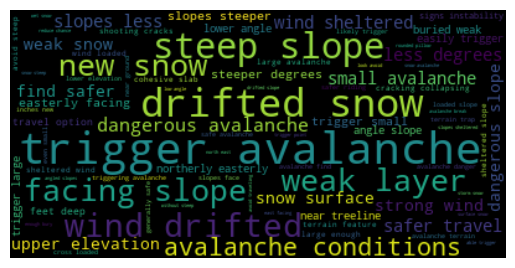

In [46]:
%matplotlib inline
wordcloud_text = ' '.join(df["summary_final"])
wordcloud_two = WordCloud().generate(wordcloud_text)

plt.imshow(wordcloud_two, interpolation='bilinear')
plt.axis("off")


plt.show()

## Visualizations

In [47]:
length = df["summary_final"].str.split().apply(len)
char = df["summary_final"].str.len()

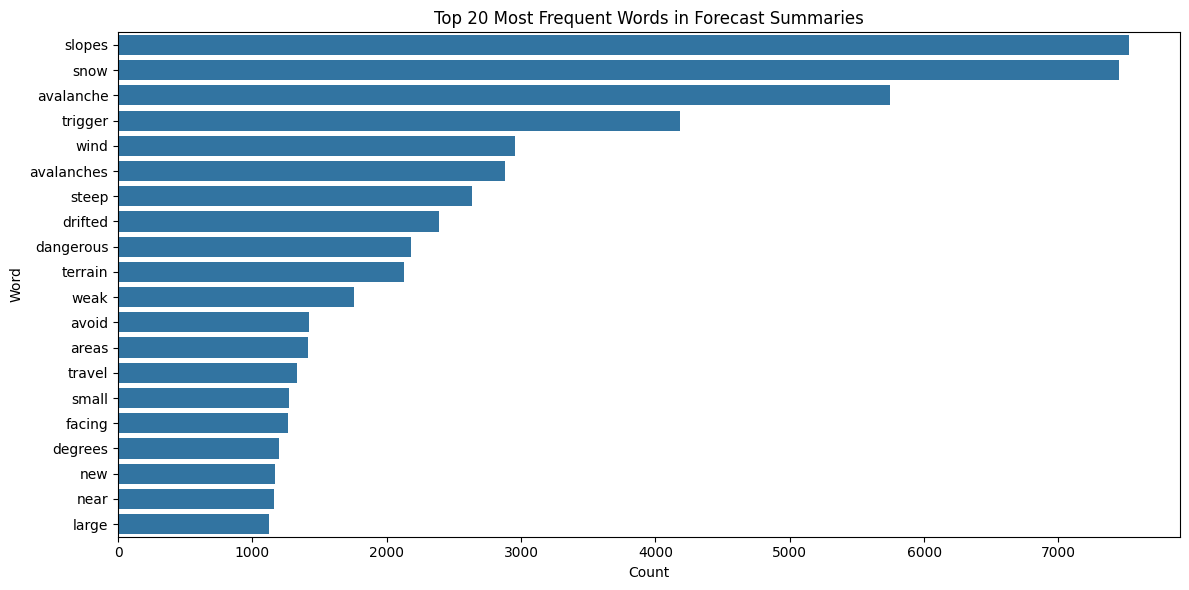

In [54]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["summary_final"])
word_counts = X.toarray().sum(axis=0)

# Create DataFrame of top words
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
top_words = word_freq.sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top_words, x='count', y='word')
plt.title("Top 20 Most Frequent Words in Forecast Summaries")
plt.xlabel("Count")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

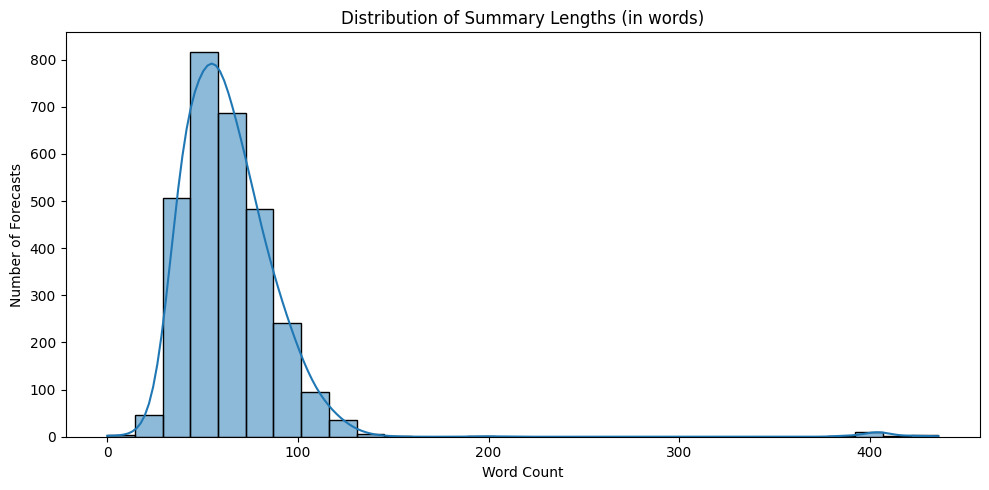

In [53]:
plt.figure(figsize=(10, 5))
sns.histplot(length, bins=30, kde=True)
plt.title("Distribution of Summary Lengths (in words)")
plt.xlabel("Word Count")
plt.ylabel("Number of Forecasts")
plt.tight_layout()
plt.show()

### Most frequent words - 'high'

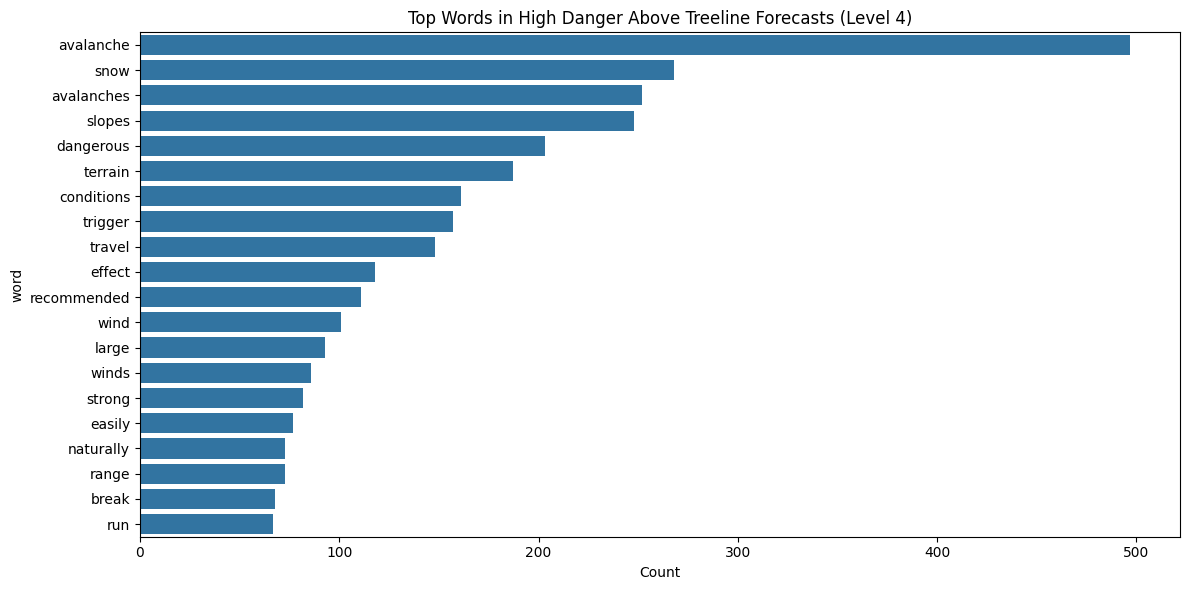

In [62]:
high_danger_texts = df[df["danger_above"] == 4]["summary_final"]
X_high = vectorizer.fit_transform(high_danger_texts)
high_word_counts = X_high.toarray().sum(axis=0)

high_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': high_word_counts
}).sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=high_word_freq, x='count', y='word')
plt.title("Top Words in High Danger Above Treeline Forecasts (Level 4)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### Most frequent words - 'considerable'

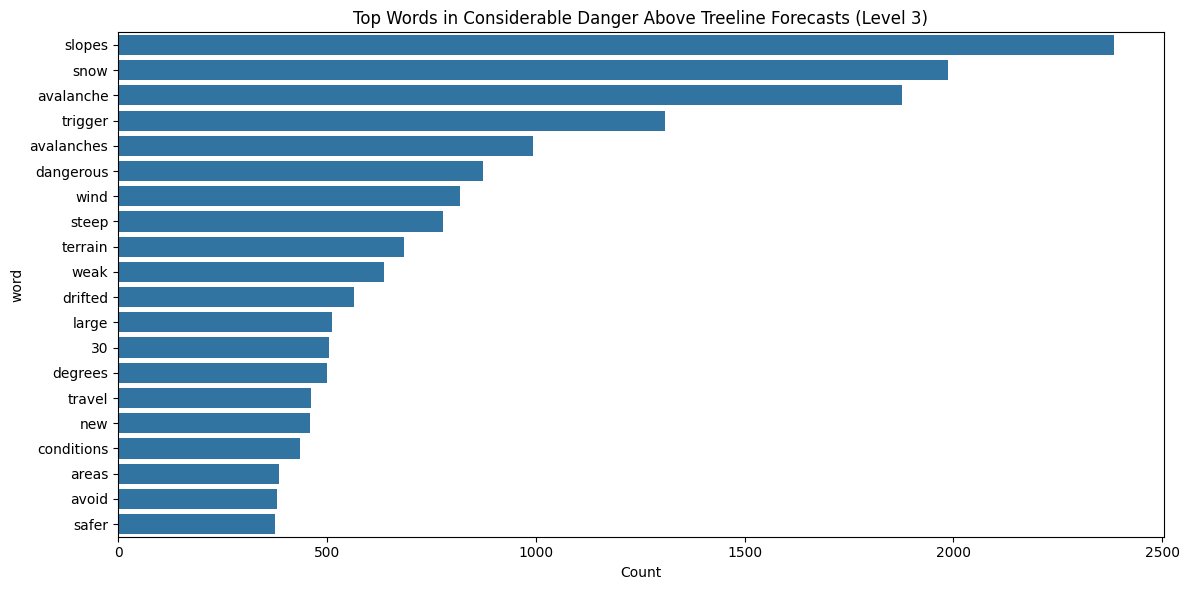

In [63]:
considerable_danger_texts = df[df["danger_above"] == 3]["summary_final"]
X_high = vectorizer.fit_transform(considerable_danger_texts)
high_word_counts = X_high.toarray().sum(axis=0)

high_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': high_word_counts
}).sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=high_word_freq, x='count', y='word')
plt.title("Top Words in Considerable Danger Above Treeline Forecasts (Level 3)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### Most frequent words - 'moderate'

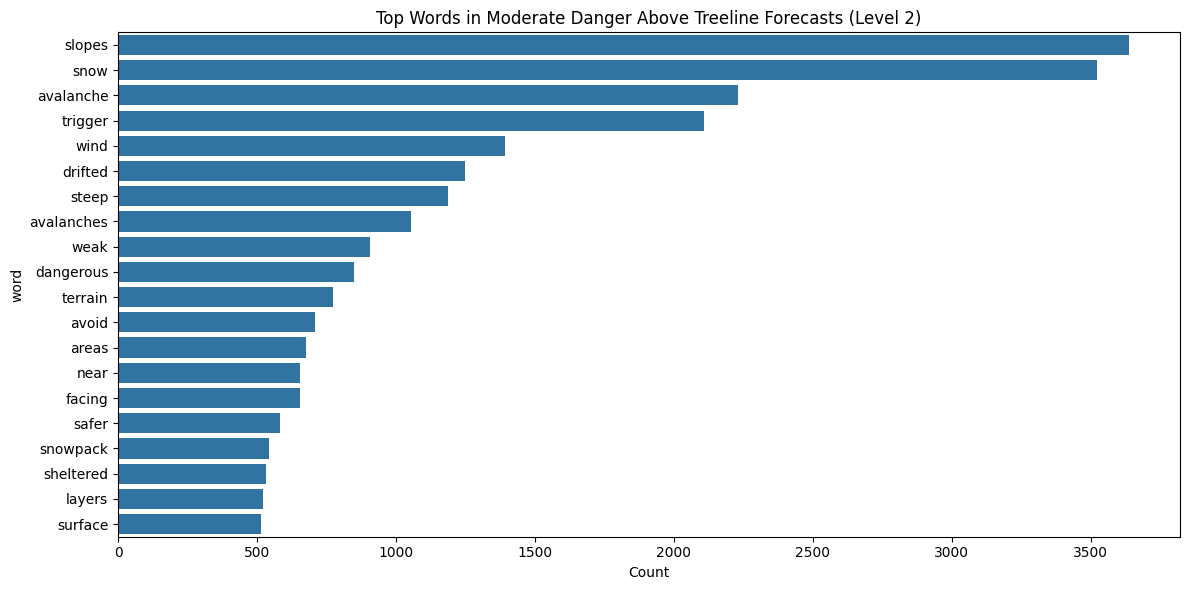

In [64]:
moderate_danger_texts = df[df["danger_above"] == 2]["summary_final"]
X_high = vectorizer.fit_transform(moderate_danger_texts)
high_word_counts = X_high.toarray().sum(axis=0)

high_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': high_word_counts
}).sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=high_word_freq, x='count', y='word')
plt.title("Top Words in Moderate Danger Above Treeline Forecasts (Level 2)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### Most frequent words - 'low'

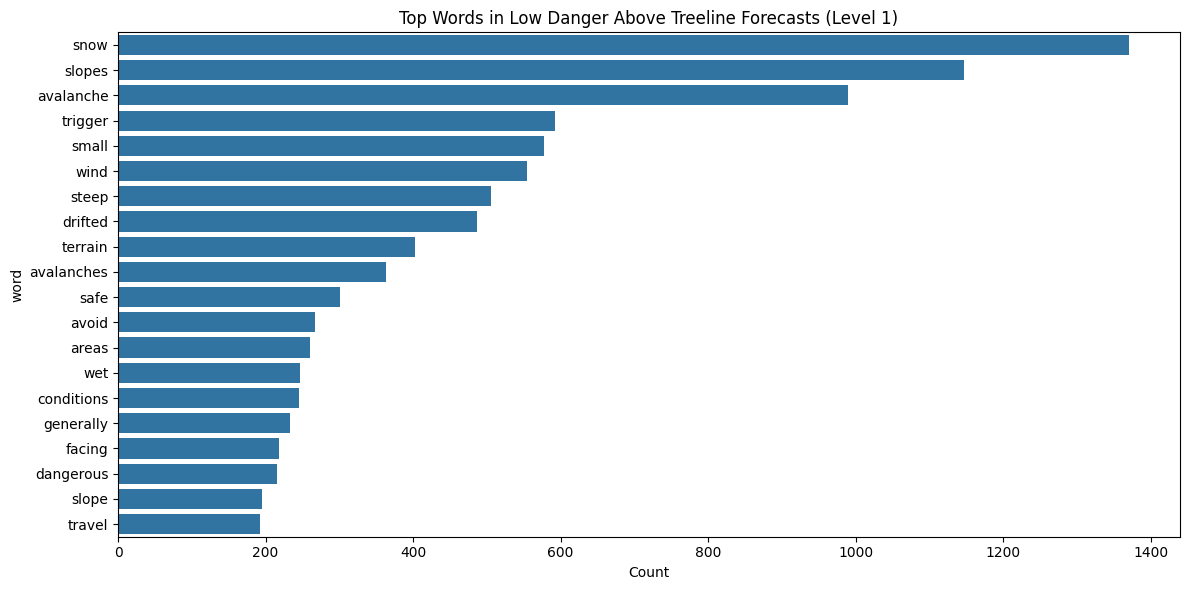

In [65]:
low_danger_texts = df[df["danger_above"] == 1]["summary_final"]
X_high = vectorizer.fit_transform(low_danger_texts)
high_word_counts = X_high.toarray().sum(axis=0)

high_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': high_word_counts
}).sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=high_word_freq, x='count', y='word')
plt.title("Top Words in Low Danger Above Treeline Forecasts (Level 1)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

### Most frequent words - 'earlySeason'

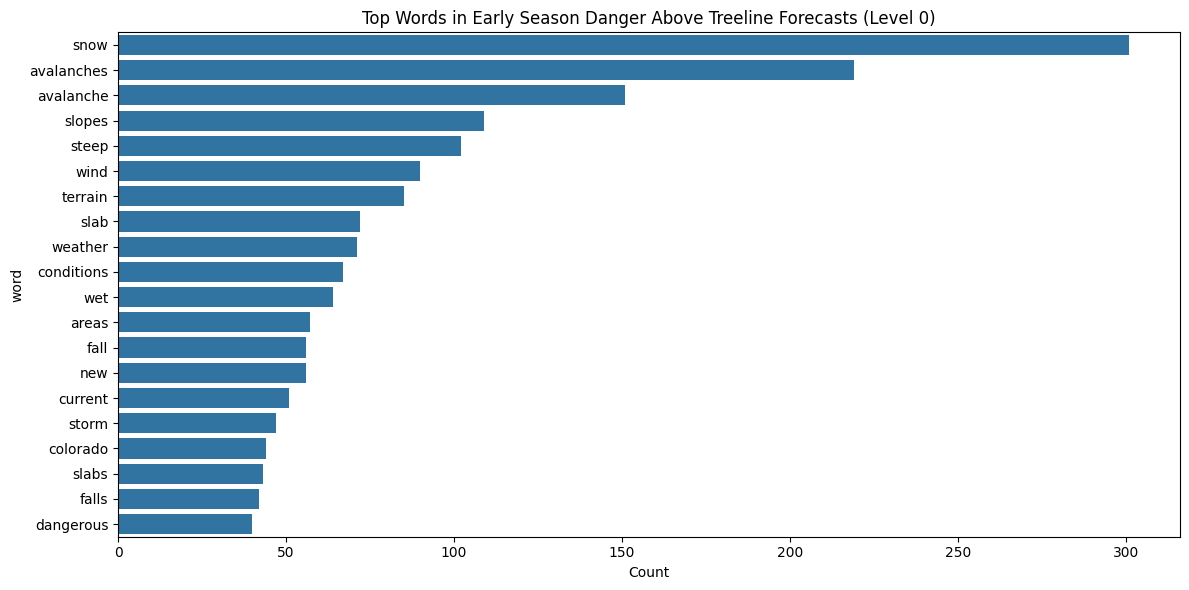

In [66]:
early_danger_texts = df[df["danger_above"] == 0]["summary_final"]
X_high = vectorizer.fit_transform(early_danger_texts)
high_word_counts = X_high.toarray().sum(axis=0)

high_word_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': high_word_counts
}).sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=high_word_freq, x='count', y='word')
plt.title("Top Words in Early Season Danger Above Treeline Forecasts (Level 0)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

## TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_features=5000,   # optional: limit for performance
    ngram_range=(1, 2)   # unigrams and bigrams
)
X_tfidf = tfidf.fit_transform(df["summary_final"])

mean_tfidf = X_tfidf.mean(axis=0).A1 
vocab = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame({
    "term": vocab,
    "mean_tfidf": mean_tfidf
}).sort_values(by="mean_tfidf", ascending=False)

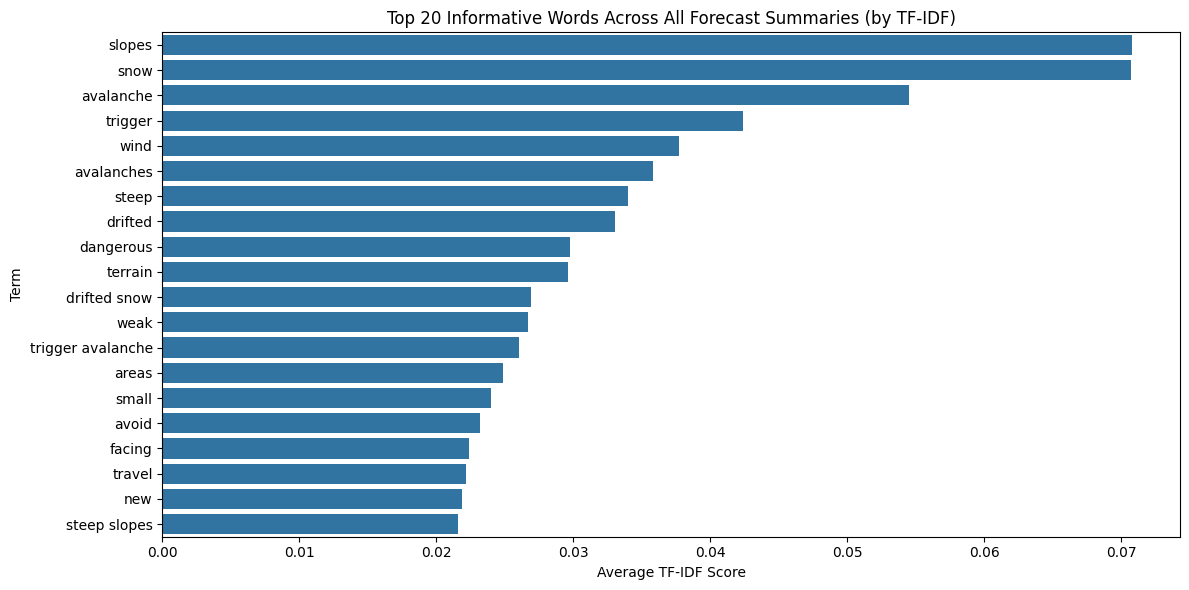

In [69]:
top_terms = tfidf_df.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_terms, y="term", x="mean_tfidf")
plt.title("Top 20 Informative Words Across All Forecast Summaries (by TF-IDF)")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Term")
plt.tight_layout()
plt.show()

In [70]:
# create new csv
df.to_csv("forecast_data_final.csv", index=False)